<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/Extract_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from google.colab import drive  

import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics

from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import itertools


In [41]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/new_datasets'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [65]:
airline = pd.read_csv("./gdrive/My Drive/datasets/new_datasets/airline_classified.csv")

In [66]:
airline.sample(5)

,Unnamed: 0,Unnamed: 0.1,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity,sentiment,reason
124,275,44,1336613386000490496,2020-12-09 10:07:18,"['fantastic', 'service', 'virginatlantic', 'ca...",0,False,NaN,en,Virgin Atlantic,fantastic service virginatlantic cancelled fli...,0.900000,0.400000,Positive,['better']
106,252,11,1337081847956824064,2020-12-10 17:08:48,"['virgin', 'sell', 'reality', 'dramatic', 'ope...",0,False,NaN,en,Virgin Atlantic,virgin sell reality dramatic opening suggests ...,0.600000,-0.433333,Negative,"['early', 'light']"
557,1268,543,1333831638669733889,2020-12-01 17:53:38,"['airway', 'covid', 'hard', 'airline', 'britis...",0,False,NaN,en,British airways,airway covid hard airline britishairways simul...,0.541667,-0.291667,Negative,NaN
63,170,142,1335271356070383621,2020-12-05 17:14:34,"['photo', 'full', 'flight', 'donotflyunited', ...",1,False,"New York, NY",en,United Airlines,photo full flight donotflyunited pandemic pand...,0.550000,0.350000,Positive,['best']
315,705,196,1336472317153734656,2020-12-09 00:46:45,"['qatarairways', 'pleased', 'announce', 'frequ...",0,False,"Duino-Aurisina, Friuli-Venezia",en,Qatar airways,qatarairways pleased announce frequent flyer p...,0.650000,0.300000,Positive,"['nice', 'nice']"


In [67]:
airline.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'tweet_id', 'created_at', 'text', 'likes',
       'retweeted', 'location', 'language', 'airline', 'string_text',
       'subjectivity', 'polarity', 'sentiment', 'reason'],
      dtype='object')

In [68]:
airline.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
tweet_id          0
created_at        0
text              0
likes             0
retweeted         0
location        192
language          0
airline           0
string_text       0
subjectivity      0
polarity          0
sentiment         0
reason          436
dtype: int64

#Extract features

Extract features from each tweet and create a column for each feature, this represented by 0 (did not find the feature) and 1 (found the feature).

In [7]:
#test
text_list = ['changi', 'ready', 'vaccine', 'distribution', 'asia', 'singapore', 'cargo', 'gear', 'safe', 'transportation']
keyword_list = ['see']
for i in text_list:
  if i in keyword_list:
    print("yes") if word == 'safe' else print("no")

In [69]:
#transfom from str to list
airline['text'] = airline['text'].apply(eval)

In [70]:
#feature: column name
#keyword_list: for that feature 
def getfeatures(feature, keyword_list):
  for index, airline_list in enumerate(airline['text']):
    if any(word in airline_list for word in keyword_list):
      airline[feature][index] = 1 
    else:
      airline[feature][index] = 0
  return airline

In [71]:
airline['cancel'] = ''
keyword_list = ['canceled', 'cancellation']
airline = getfeatures('cancel', keyword_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
airline['staff'] = ''
keyword_list = ['staff', 'crew', 'team', 'agent', 'personnel', 'worker', 'workforce', 'employee', 'group']
airline = getfeatures('staff', keyword_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
airline['flight'] = ''
keyword_list = ['flight', 'aviation', 'transport']
airline = getfeatures('flight', keyword_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
airline['cost'] = ''
keyword_list = ['cost', 'money', 'price', 'expensive', 'cheap','deal', 'offer', 'dollars', 'overpriced', 'underpriced'$,
                'expense', 'charge', 'value', 'expenditure','cash']
airline = getfeatures('cost', keyword_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
airline['refund'] = ''
keyword_list = ['refund', 'return', 'repayment', 'pay', 'give', 'back', 'repaid']
airline = getfeatures('refund', keyword_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
airline['customrt service'] = ''
keyword_list = ['service', 'customer', 'client', 'care', 'support', 'assistance','friendly']
airline = getfeatures('customrt service', keyword_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
airline['experience'] = ''
keyword_list = ['experience','undergo']
airline = getfeatures('experience', keyword_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
airline.sample(5)

,Unnamed: 0,Unnamed: 0.1,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity,sentiment,reason,cancel,staff,flight,cost,refund,customrt service,experience
202,451,134,1336247169662263296,2020-12-08 09:52:06,"[mwah, comeback, great, turkishairlines, turki...",0,False,NaN,en,Turkish airlines,mwah comeback great turkishairlines turkishair...,0.750000,0.800000,Positive,['behind'],0,0,0,0,0,0,0
247,566,32,1335164076079501312,2020-12-05 10:08:16,"[coronavirus, singapore, airline, ready, fleet...",1,False,"San Francisco, singapore",en,Singapor airlines,coronavirus singapore airline ready fleet ship...,0.500000,0.200000,Positive,"['best', 'best']",0,0,0,0,0,0,0
250,570,37,1334701348059635712,2020-12-04 03:29:33,"[singapore, airline, singapore, airline, expen...",0,False,"Paris, France",en,Singapor airlines,singapore airline singapore airline expensive ...,0.700000,-0.500000,Negative,['ready'],0,0,0,1,0,0,0
18,61,633,1333819527759622144,2020-12-01 17:05:31,"[iran, foreign, minister, zarif, desperate, bl...",0,False,مملكة البحرين,en,Saudia airlines,iran foreign minister zarif desperate blame ki...,0.508333,-0.341667,Negative,['empty'],0,0,0,0,0,0,0
171,377,257,1334650543902400513,2020-12-04 00:07:40,"[remember, flying, barbarella, ruby, tuesday, ...",4,False,New Mexico,en,Virgin Atlantic,remember flying barbarella ruby tuesday surely...,0.888889,0.500000,Positive,"['unique', 'extraordinary']",0,0,0,0,0,0,0


#Count how many 1's in each features' column 

In [56]:
color_list = [ '#d73027',
              '#1a9850']

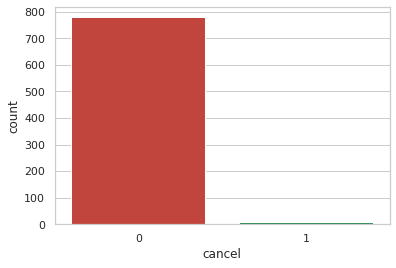

In [57]:
#add airline as well or you mighr do this in EDA and here just count how many one's do you have 
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="cancel",data=airline,palette= color_list )

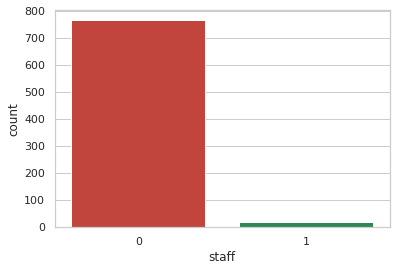

In [58]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="staff",data=airline,palette= color_list)

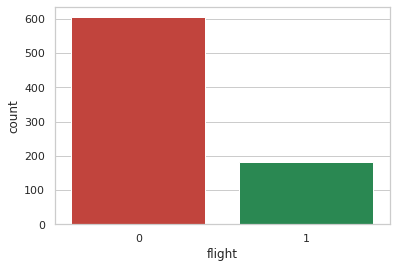

In [59]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="flight",data=airline, palette= color_list)

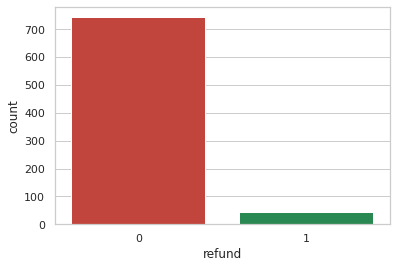

In [60]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="refund",data=airline,palette= color_list)

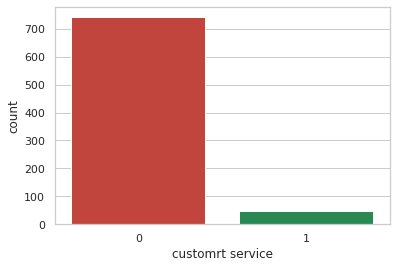

In [61]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="customrt service",data=airline,palette= color_list)

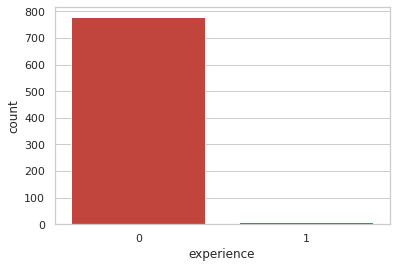

In [62]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="experience",data=airline, palette= color_list)

#Save the data set

In [79]:
#save them first because without saving it, it will cause me issues later
airline.to_csv('airline_features.csv')
!cp airline_features.csv "./gdrive/My Drive/datasets/new_datasets/"